In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

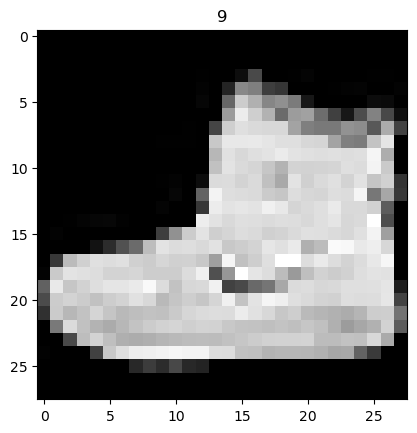

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [5]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

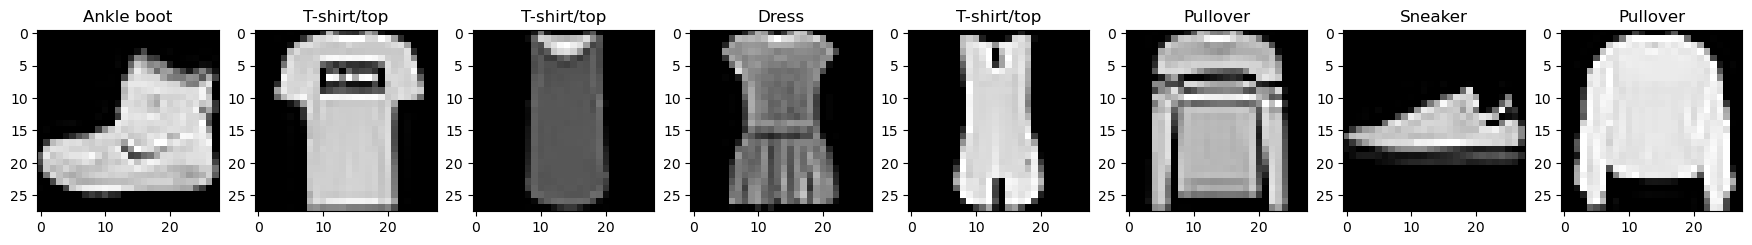

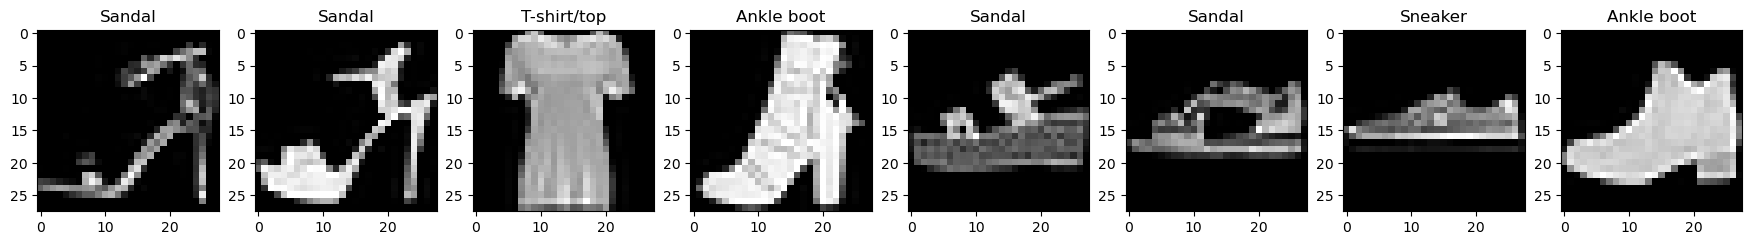

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Dense Layer를 기반으로 모델을 생성

In [9]:
INPUT_SIZE = 28

sequential은 input layer인지 아닌지 모른다. Input layer는 일반 layer와 차이가 있다.
왜냐하면 일반 layer은 입력을 받고 출력을 내보내는거 까지인데, Input은 그냥 들어가기만 한다.
그래서 Sequential은 input_shape이라는 인자를 받으면 input layer구나? 하고 이해한다.

In [10]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

categorical crossentropty는 무조건 ohe(one hot encoding)

In [12]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [13]:
train_images.shape

(60000, 28, 28)

fit의 x에 train_images는 3차원으로 들어온다. 60000 x 28 x 28.
하지만, 모델에서 flatten으로 2차원을 1차원으로 바꾼다. 
batch는 framework가 알아서 받아드린다.

In [14]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5132 - accuracy: 0.8194
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8629
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3419 - accuracy: 0.8751
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3197 - accuracy: 0.8823
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3031 - accuracy: 0.8889
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2871 - accuracy: 0.8939
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2782 - accuracy: 0.8966
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2657 - accuracy: 0.9014
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2540 - accuracy: 0.9052
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.24

model(history)안에 history라는 메서드가 있다.

In [15]:
print(history.history['loss'])
print(history.history['accuracy'])


[0.5132222771644592, 0.3793444037437439, 0.34185001254081726, 0.31971001625061035, 0.3030632734298706, 0.2871289849281311, 0.27816689014434814, 0.2657467722892761, 0.2540130615234375, 0.24629949033260345, 0.2388293296098709, 0.23299983143806458, 0.2268678843975067, 0.22172588109970093, 0.21348357200622559, 0.2083512246608734, 0.20427508652210236, 0.19979137182235718, 0.19583715498447418, 0.1913934201002121]
[0.819350004196167, 0.8628666400909424, 0.8751166462898254, 0.8822833299636841, 0.888866662979126, 0.8938999772071838, 0.8966166377067566, 0.9014166593551636, 0.9052166938781738, 0.9082666635513306, 0.9092166423797607, 0.9128666520118713, 0.9142000079154968, 0.9169999957084656, 0.9200166463851929, 0.9210333228111267, 0.9239500164985657, 0.9254166483879089, 0.9261999726295471, 0.9276000261306763]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
pred_proba = model.predict(test_images)#예측할 이미지 배열
print(pred_proba.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


이미지 한개는 (28,28)로 2차원이다. 따라서 이걸 하나만 예측해볼려고하면 차원을 3차원으로 만들어야한다.
입력은 3차원이었지만 모델은 이미지 batch 개수를 무시하고 이미지 하나로 (2차원으로) 받아들인다.
axis = -1이면 가장 마지막 차원에 추가한다.

In [18]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

softmax output은 2차원으로 나온다.
처음에 차원을 하나 늘렸으니까 squeeze로 차원을 하나 줄여준다.

In [19]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)


1/1 [==============================] - 0s 25ms/step
softmax output: [[1.7939911e-08 1.3298033e-08 4.0176633e-07 1.2158152e-07 5.8277222e-10
  4.4244382e-04 1.6545787e-08 2.3078788e-02 3.3530310e-11 9.7647822e-01]]
predicted class value: 9


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

학습을 ohe한걸로 학습했으므로 evaluate도 ohe한 걸로.

In [21]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8865


[0.35985493659973145, 0.8865000009536743]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [22]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

train_test_split에서 feature 데이터셋, target 데이터셋...


In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행. 

In [24]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

fit에서 x는 feature값, y는 레이블값, batch_size 크게하면 좀 더 빨라진다.

In [25]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 3s 6ms/step - loss: 0.6000 - accuracy: 0.7962 - val_loss: 0.4790 - val_accuracy: 0.8280
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4147 - accuracy: 0.8542 - val_loss: 0.4013 - val_accuracy: 0.8533
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3796 - accuracy: 0.8640 - val_loss: 0.3841 - val_accuracy: 0.8600
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3473 - accuracy: 0.8750 - val_loss: 0.3885 - val_accuracy: 0.8592
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3303 - accuracy: 0.8804 - val_loss: 0.3758 - val_accuracy: 0.8596
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3130 - accuracy: 0.8858 - val_loss: 0.3477 - val_accuracy: 0.8732
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3008 - accuracy: 0.8905 - val_loss: 0.3411 - val_accuracy: 0.8760
Epoch 

In [26]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.5999919176101685, 0.41472703218460083, 0.37962496280670166, 0.3472539186477661, 0.33033689856529236, 0.312963604927063, 0.3008427321910858, 0.289885014295578, 0.27817416191101074, 0.26899629831314087, 0.2612329125404358, 0.25107046961784363, 0.24431341886520386, 0.2368876039981842, 0.23286232352256775, 0.22772085666656494, 0.22386974096298218, 0.21844762563705444, 0.21104994416236877, 0.2054341733455658]
[0.7962157130241394, 0.8541960716247559, 0.8640000224113464, 0.8749607801437378, 0.8803529143333435, 0.8858235478401184, 0.8905490040779114, 0.8934509754180908, 0.8976666927337646, 0.9010000228881836, 0.902803897857666, 0.9067842960357666, 0.9095097780227661, 0.9128823280334473, 0.9132549166679382, 0.9152941107749939, 0.9160980582237244, 0.9181764721870422, 0.9205490350723267, 0.9229803681373596]
[0.4790259897708893, 0.4012881815433502, 0.3840920925140381, 0.38851937651634216, 0.3758106231689453, 0.3477356433868408, 0.341065376996994, 0.33707112073898315, 0.33899277448654175, 0.3289

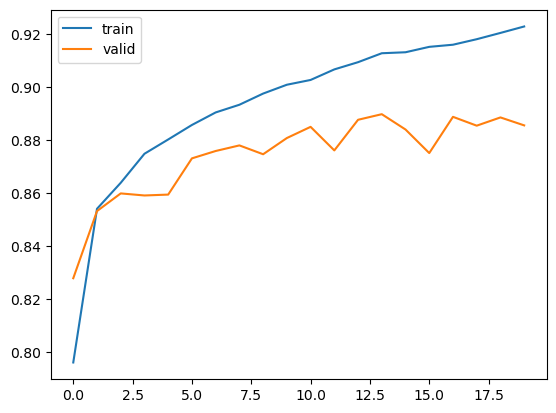

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [28]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

입력데이터 자체는 2차원 데이터이다. Function API는 만들때 input을 명시해줘야한다.
왜냐하면 모델을 만들때 input이 뭔지 물어본다. 
처음에 Flatten 객체를 만든다. 그런데 객체 뒤에 또 인자가 들어간다.
Functional API는 객체를 만들어준 후에 입력 인자를 넣어준다. 
### 출력 값 = F|(생성 파라미터) (입력인자) 
layer는 입력을 받고 출력을 생성한다. 이러한 출력은 다음 layer의 입력으로 들어간다.

In [29]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)#처음에 Flatten객체를 만들어준다.
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
 
model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [30]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):#Layer를 상속받는다.
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):#python의 __call__ 역할
        return tf.matmul(inputs, self.w) + self.b#weighted sum 계산

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs)#units = 10

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [31]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)#객체 생성하고
outputs = my_layer(inputs)#객체에 다시 입력을 넣는다.

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [32]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_2 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [33]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
1 <__main__.CustomDense object at 0x7de457242290>
2 <__main__.CustomDense object at 0x7de457242b60>
3 <keras.layers.activation.relu.ReLU object at 0x7de457262e60>


In [34]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [3]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    #여기에 3차원으로 넣어버리면(60000,28,28) 케라스가 4차원이라고 인식한다. 
    #왜냐하면 케라스 프레임워크가 batch로 3차원으로 들어온다고 인식한다.
    #따라서, 2차원으로 넣어주면 알아서 3차원이라고 해석한다. 
    input_tensor = Input(shape = (INPUT_SIZE,INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100,activation = 'relu')(x)
    x = Dense(30,activation = 'relu')(x)
    output = Dense(10,activation = 'softmax')(x)
    
    model = Model(inputs = input_tensor,outputs = output)
    return model
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 30)                3030      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [11]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images,labels):
    images = np.array(images/255.0, dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    
    return images , labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images,labels):
    images, labels = get_preprocessed_data(images,labels)
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size = 0.15,random_state = 2021):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images,train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images,test_labels)    
    
    tr_images, val_images,tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels,test_size = valid_size,random_state = random_state)
    return (tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images,test_oh_labels)

In [12]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape,test_images.shape,test_labels.shape)
(tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images,test_oh_labels) =\
    get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size = 0.15, random_state = 2021)
print(tr_images.shape,tr_oh_labels.shape,val_images.shape,val_oh_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [13]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 30)                3030      
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 학습 수행. 
history = model.fit(x = tr_images,y = tr_oh_labels,batch_size = 128,epochs = 20, validation_data = (val_images,val_oh_labels))
#모델에 batch size 만큼 들어간다. 예를들어 (batch_size, 28, 28)이 들어간다.

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3389 - accuracy: 0.8779 - val_loss: 0.3604 - val_accuracy: 0.8706
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.8840 - val_loss: 0.3501 - val_accuracy: 0.8730
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3120 - accuracy: 0.8867 - val_loss: 0.3495 - val_accuracy: 0.8717
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3015 - accuracy: 0.8899 - val_loss: 0.3349 - val_accuracy: 0.8766
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2907 - accuracy: 0.8935 - val_loss: 0.3329 - val_accuracy: 0.8812
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2801 - accuracy: 0.8969 - val_loss: 0.3289 - val_accuracy: 0.8782
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2731 - accuracy: 0.9000 - val_loss: 0.3223 - val_accuracy: 0.8843
Epoch 

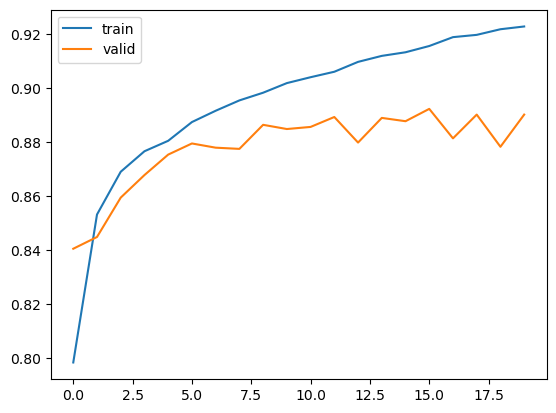

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [41]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)


40/40 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8830


[0.3370741605758667, 0.8830000162124634]

### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

save weights 하고 load weights 하는게 맞다.

In [19]:
!pwd

/kaggle/working


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 3s 4ms/step - loss: 0.5888 - accuracy: 0.7963 - val_loss: 0.4553 - val_accuracy: 0.8338
Epoch 2/10
399/399 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8537 - val_loss: 0.4106 - val_accuracy: 0.8550
Epoch 3/10
394/399 [============================>.] - ETA: 0s - loss: 0.3740 - accuracy: 0.8662
Epoch 3: val_loss improved from inf to 0.37445, saving model to /kaggle/working/weights.03-0.37.hdf5
399/399 [==============================] - 2s 4ms/step - loss: 0.3738 - accuracy: 0.8664 - val_loss: 0.3745 - val_accuracy: 0.8618
Epoch 4/10
399/399 [==============================] - 2s 4ms/step - loss: 0.3507 - accuracy: 0.8743 - val_loss: 0.3962 - val_accuracy: 0.8556
Epoch 5/10
399/399 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8821 - val_loss: 0.3687 - val_accuracy: 0.8682
Epoch 6/10
385/399 [===========================>..] - ETA: 0s - loss: 0.3152 - accuracy: 0.8851
Epoch 6:

In [21]:
!ls -lia
!rm -rf weight*
!ls -lia


total 1024
   786435 drwxr-xr-x 3 root root   4096 Jul  7 09:48 .
268738099 drwxr-xr-x 5 root root   4096 Jul  7 08:35 ..
   786440 drwxr-xr-x 2 root root   4096 Jul  7 08:35 .virtual_documents
   786439 ---------- 1 root root    263 Jul  7 08:35 __notebook_source__.ipynb
   786441 -rw-r--r-- 1 root root 343904 Jul  7 09:48 weights.03-0.37.hdf5
   786442 -rw-r--r-- 1 root root 343904 Jul  7 09:48 weights.06-0.36.hdf5
   786443 -rw-r--r-- 1 root root 343904 Jul  7 09:48 weights.09-0.34.hdf5
total 16
   786435 drwxr-xr-x 3 root root 4096 Jul  7 09:49 .
268738099 drwxr-xr-x 5 root root 4096 Jul  7 08:35 ..
   786440 drwxr-xr-x 2 root root 4096 Jul  7 08:35 .virtual_documents
   786439 ---------- 1 root root  263 Jul  7 08:35 __notebook_source__.ipynb


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [45]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 3s 5ms/step - loss: 0.6143 - accuracy: 0.7942 - val_loss: 0.4834 - val_accuracy: 0.8309 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 5ms/step - loss: 0.4268 - accuracy: 0.8513 - val_loss: 0.3986 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3745 - accuracy: 0.8675 - val_loss: 0.3910 - val_accuracy: 0.8591 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3517 - accuracy: 0.8730 - val_loss: 0.3653 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3316 - accuracy: 0.8805 - val_loss: 0.3722 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3145 - accuracy: 0.8860 - val_loss: 0.3577 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 3s 5ms/step - loss: 0.6224 - accuracy: 0.7940 - val_loss: 0.4510 - val_accuracy: 0.8434
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4117 - accuracy: 0.8570 - val_loss: 0.4250 - val_accuracy: 0.8489
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3769 - accuracy: 0.8668 - val_loss: 0.3918 - val_accuracy: 0.8604
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3511 - accuracy: 0.8748 - val_loss: 0.3743 - val_accuracy: 0.8664
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3281 - accuracy: 0.8807 - val_loss: 0.3509 - val_accuracy: 0.8762
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3103 - accuracy: 0.8887 - val_loss: 0.3369 - val_accuracy: 0.8799
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.8905 - val_loss: 0.3366 - val_accuracy: 0.8824
Epoch 

In [47]:
!rm weigh*

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 3s 5ms/step - loss: 0.6084 - accuracy: 0.7911 - val_loss: 0.4715 - val_accuracy: 0.8349 - lr: 0.0010
Epoch 2/40
399/399 [==============================] - 2s 4ms/step - loss: 0.4203 - accuracy: 0.8520 - val_loss: 0.4184 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 3/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3807 - accuracy: 0.8656 - val_loss: 0.3757 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 4/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3518 - accuracy: 0.8759 - val_loss: 0.3542 - val_accuracy: 0.8729 - lr: 0.0010
Epoch 5/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3339 - accuracy: 0.8801 - val_loss: 0.3934 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 6/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3161 - accuracy: 0.8857 - val_loss: 0.3447 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 7/40
399/399 [==============================] - 2s 5ms/step - lo

In [49]:
!ls -lia

total 3756
   262148 drwxr-xr-x 3 root root   4096 Jul  6 08:01 .
268738099 drwxr-xr-x 5 root root   4096 Jul  6 07:53 ..
   262152 drwxr-xr-x 2 root root   4096 Jul  6 07:53 .virtual_documents
   262151 ---------- 1 root root    263 Jul  6 07:53 __notebook_source__.ipynb
   262153 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.01-0.47.hdf5
   262154 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.02-0.42.hdf5
   262155 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.03-0.38.hdf5
   262156 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.04-0.35.hdf5
   262157 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.06-0.34.hdf5
   262158 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.07-0.34.hdf5
   262159 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.09-0.32.hdf5
   262160 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.10-0.32.hdf5
   262161 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.14-0.31.hdf5
   262162 -rw-r--r-- 1 root root 344080 Jul  6 08:01 weights.